## Car Price Prediction

In [2]:
#Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns



In [3]:
#importing datset
dataset=pd.read_csv('CarPrice_Assignment.csv')
dataset

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [5]:
#checking whether dataset has null values
dataset.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

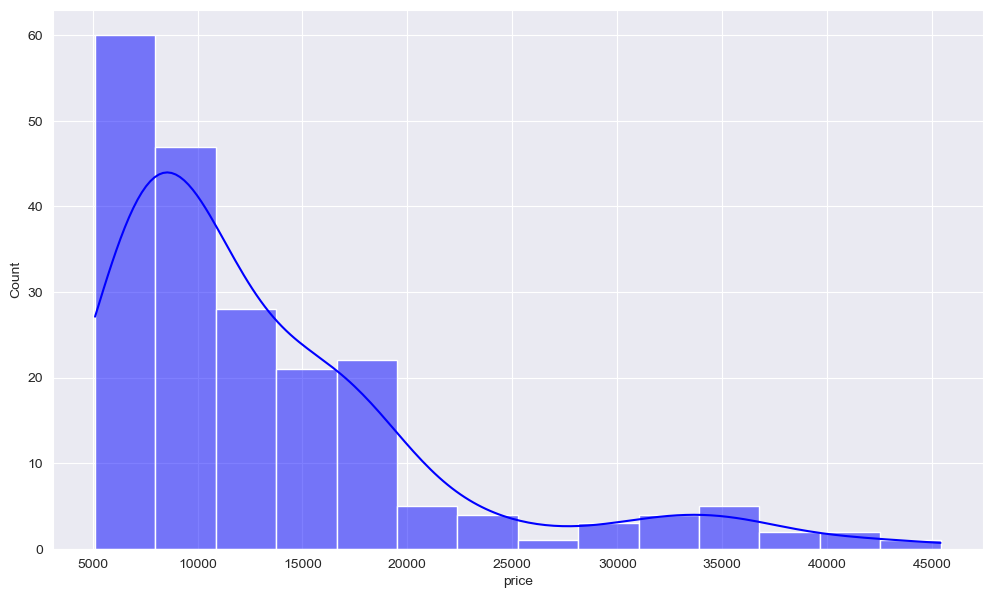

In [17]:
#distribution of values of price column
sns.set_style('darkgrid')
plt.figure(figsize=(12,7))
sns.histplot(dataset.price,kde=True,color='blue')
plt.show()

In [27]:
#splitting data into train and test 
dataset=dataset[["symboling","wheelbase","carlength","carwidth","carheight","curbweight","enginesize","boreratio","stroke","compressionratio","horsepower","peakrpm","citympg","highwaympg","price"]]
X=np.array(dataset.drop('price',axis=1))
Y=np.array(dataset['price'])
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2)

In [28]:
#scaling Data
scaler=MinMaxScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.transform(xtest)



In [29]:
#Training Model
model=DecisionTreeRegressor()
model.fit(xtrain,ytrain)
predictions=model.predict(xtest)

In [33]:
#Evaluating Model
print(f"Accuracy               : {model.score(xtest,predictions)*100}")
print(f"R Squared Error        : {round(metrics.r2_score(ytest,predictions)*100,2)}")
print(f"Mean Absolute Error    : {metrics.mean_absolute_error(ytest,predictions)}")
print(f"Mean Squared Error     : {metrics.mean_squared_error(ytest,predictions)}")
print(f"Root Mean Sqaured Error: {np.sqrt(metrics.mean_squared_error(ytest,predictions))}")



Accuracy               : 100.0
R Squared Error        : 89.58
Mean Absolute Error    : 1930.3658536585365
Mean Squared Error     : 7896484.695121951
Root Mean Sqaured Error: 2810.0684502556073


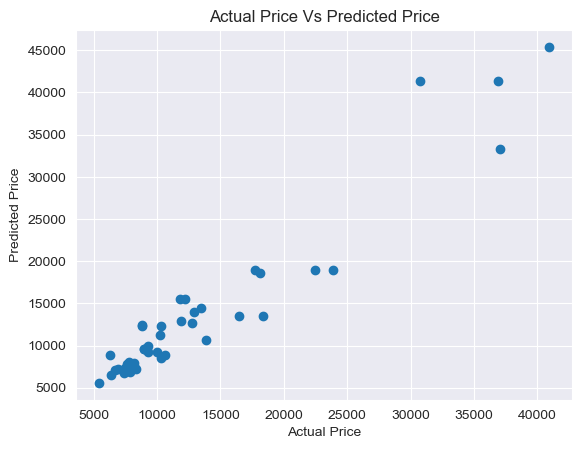

In [34]:
#plotting actual and predicted price
plt.scatter(ytest,predictions)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price Vs Predicted Price')
plt.show()

In [43]:
#testing the model
def PredictCarPrice(x):
    #input_Data
    carData=dataset.drop('price',axis=1).iloc[x]
    
    #Scaling Input Data
    Scaler=scaler.transform(carData.values.reshape(-1,14))
    
    #predict the input Data
    prediction=model.predict(Scaler)
    
    print(f"Predicted price of this car is : {prediction[0]}")
    print()
    
    ActualPrice=dataset.iloc[x].price
    print(f"Actual Price of car is: {ActualPrice}")

PredictCarPrice(20)

Predicted price of this car is : 6575.0

Actual Price of car is: 6575.0
